# Higher-order FD schemes applied to the wave equation

u_t + c*u_x = 0

I.C:

 u(x,0) = sin(4pix); 0 <= x < 0.25
 u(x,0) = sin(4pi(x-0.25)); 0 <= x < 0.25
 u(x,0) = 0 ; 0.25<=x <= 1
 
B.C: Periodic

a. 601 temportal nodes & 51 spatial nodes

 i) using explicit 1st order forward time and 1st order backward space
 ii) using implicit 1st order backward time and 2nd order central space
 iii) plot solution at t =[0,2,4,6] and comment on the result
 
b. Repeat question a but using 201 temporal nodes and 101 spatial nodes comment regarding stability and CFL condition
 

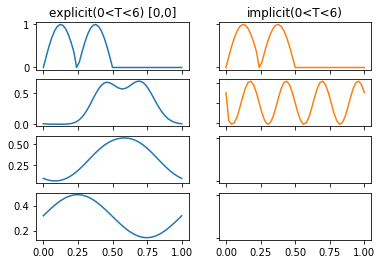

In [133]:
import matplotlib.pyplot as plt
c = .5 ; L = 1 ;Nx = 51 ;Nt = 601
x = np.linspace(0,L,Nx)


def ext(T):
    import numpy as np
    import matplotlib.pyplot as plt


    c = 0.5
    L = 1
    
    Nx = 51
    Nt = 601
    x = np.linspace(0,L,Nx)
    t = np.linspace(0,T,Nt)
    sec = int((Nt-1)/6*T)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    C = c*dt/dx
    u = np.zeros(Nx) 
    un = np.zeros(Nx)
    u[0:int(Nx*.25)] = np.sin(4*np.pi*x[0:int(Nx*.25)])
    u[int((Nx+1)*.25):int(.5*Nx)]= np.sin(4*np.pi*(x[int((Nx+1)*.25):int(.5*Nx)]-0.25))
    un = u.copy()

    for n in range(sec):
        un=u.copy()   
        u[1:] = un[1:]*(1-C)+C*u[0:-1] # this is weird... maybe because the b.c
        u[0] = u[-1]                #  is periodic the usual notationa for vecotorization
                                # did not work.
    return u

def imt(T):

    import numpy as np
    import matplotlib.pyplot as plt
    c = .5 ; L = 1 ;Nx = 51 ;Nt = 601
    x = np.linspace(0,L,Nx)
    t = np.linspace(0,T,Nt)

    sec = int((Nt-1)/6*T)

    dx = x[1] - x[0]
    dt = t[1] - t[0]

    C = c*dt/dx/dx
    main = np.ones(Nx)*(1-2*C)
    up = np.ones(Nx-1)*C
    down = np.ones(Nx-1)*C
    
    # visual way
    main = np.diag(main,k=0)
    up = np.diag(up,k=1)
    down = np.diag(down,k=-1)
    
    A = main  + down +up
    im = np.zeros(Nx) 
    imn = np.zeros(Nx)
    im[0:int(Nx*.25)] = np.sin(4*np.pi*x[0:int(Nx*.25)])
    im[int((Nx+1)*.25):int(.5*Nx)]= np.sin(4*np.pi*(x[int((Nx+1)*.25):int(.5*Nx)]-0.25))
    # inefficient way just use thomas algorithm 

    for n in range(sec):
        imn = im.copy()
        im  = np.linalg.solve(A,(imn))
        im[0] = im[-1]
        
    return im



fig, axs = plt.subplots(4, 2)
axs[0, 0].plot(x, ext(0), 'tab:blue')
axs[0, 0].set_title('explicit(0<T<6) [0,0]')
axs[0, 1].plot(x, imt(0), 'tab:orange')
axs[0, 1].set_title('implicit(0<T<6)')
axs[1, 0].plot(x, ext(2), 'tab:blue')

axs[1, 1].plot(x, imt(2), 'tab:orange')

axs[2, 0].plot(x, ext(4), 'tab:blue')

axs[2, 1].plot(x, imt(4), 'tab:orange')

axs[3, 0].plot(x, ext(6), 'tab:blue')

axs[3, 1].plot(x, imt(6), 'tab:orange')




# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


Something happened with the implicit solver. I think it has to do with the fact that a central differencing scheme was used to solve something that is moving forward. Cannot say for sure though. Only way to know for sure is to implement backward scheme for the second one. I will get back to this one later. The solution from the implicit solver is extremely large compared to the explicit solver. More things that I do, more I realize that I know basically nothing. 



Trying the implicit solver with backward spatial differencing shows that it is indeed central difference that is causing the issue

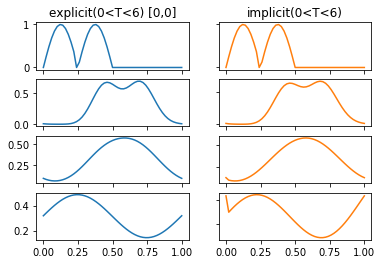

In [134]:
import matplotlib.pyplot as plt
c = .5 ; L = 1 ;Nx = 51 ;Nt = 601
x = np.linspace(0,L,Nx)


def ext(T):
    import numpy as np
    import matplotlib.pyplot as plt


    c = 0.5
    L = 1
    
    Nx = 51
    Nt = 601
    x = np.linspace(0,L,Nx)
    t = np.linspace(0,T,Nt)
    sec = int((Nt-1)/6*T)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    C = c*dt/dx
    u = np.zeros(Nx) 
    un = np.zeros(Nx)
    u[0:int(Nx*.25)] = np.sin(4*np.pi*x[0:int(Nx*.25)])
    u[int((Nx+1)*.25):int(.5*Nx)]= np.sin(4*np.pi*(x[int((Nx+1)*.25):int(.5*Nx)]-0.25))
    un = u.copy()

    for n in range(sec):
        un=u.copy()   
        u[1:] = un[1:]*(1-C)+C*u[0:-1] # this is weird... maybe because the b.c
        u[0] = u[-1]                #  is periodic the usual notationa for vecotorization
                                # did not work.
    return u

def imt(T):

    import numpy as np
    import matplotlib.pyplot as plt
    c = .5 ; L = 1 ;Nx = 51 ;Nt = 601
    x = np.linspace(0,L,Nx)
    t = np.linspace(0,T,Nt)

    sec = int((Nt-1)/6*T)

    dx = x[1] - x[0]
    dt = t[1] - t[0]

    C = c*dt/dx
    main = np.ones(Nx)*(1+1*C)
    up = np.ones(Nx-1)*C
    down = np.ones(Nx-1)*-C
    
    # visual way
    main = np.diag(main,k=0)
    up = np.diag(up,k=1)
    down = np.diag(down,k=-1)
    
    A = main  + down 
    im = np.zeros(Nx) 
    imn = np.zeros(Nx)
    im[0:int(Nx*.25)] = np.sin(4*np.pi*x[0:int(Nx*.25)])
    im[int((Nx+1)*.25):int(.5*Nx)]= np.sin(4*np.pi*(x[int((Nx+1)*.25):int(.5*Nx)]-0.25))
    # inefficient way just use thomas algorithm 

    for n in range(sec):
        imn = im.copy()
        im  = np.linalg.solve(A,(imn))
        im[0] = im[-1]
        
    return im



fig, axs = plt.subplots(4, 2)
axs[0, 0].plot(x, ext(0), 'tab:blue')
axs[0, 0].set_title('explicit(0<T<6) [0,0]')
axs[0, 1].plot(x, imt(0), 'tab:orange')
axs[0, 1].set_title('implicit(0<T<6)')
axs[1, 0].plot(x, ext(2), 'tab:blue')

axs[1, 1].plot(x, imt(2), 'tab:orange')

axs[2, 0].plot(x, ext(4), 'tab:blue')

axs[2, 1].plot(x, imt(4), 'tab:orange')

axs[3, 0].plot(x, ext(6), 'tab:blue')

axs[3, 1].plot(x, imt(6), 'tab:orange')


    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Not really sure why things start becoming weird again when the time is at 6, but this shows that central differencing is not good for the 1st order wave equation. This kinda make sense because things are moving forward and quantities downstream will probably not affect the solution that much. 

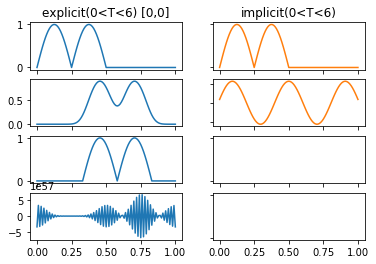

In [137]:
import matplotlib.pyplot as plt
c = .5 ; L = 1 ;Nx = 101 ;Nt = 601
x = np.linspace(0,L,Nx)


def ext(T):
    import numpy as np
    import matplotlib.pyplot as plt


    c = 0.5
    L = 1
    
    Nx = 101
    Nt = 201
    x = np.linspace(0,L,Nx)
    t = np.linspace(0,T,Nt)
    sec = int((Nt-1)/6*T)
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    C = c*dt/dx
    u = np.zeros(Nx) 
    un = np.zeros(Nx)
    u[0:int(Nx*.25)] = np.sin(4*np.pi*x[0:int(Nx*.25)])
    u[int((Nx+1)*.25):int(.5*Nx)]= np.sin(4*np.pi*(x[int((Nx+1)*.25):int(.5*Nx)]-0.25))
    un = u.copy()

    for n in range(sec):
        un=u.copy()   
        u[1:] = un[1:]*(1-C)+C*u[0:-1] # this is weird... maybe because the b.c
        u[0] = u[-1]                #  is periodic the usual notationa for vecotorization
                                # did not work.
    return u

def imt(T):

    import numpy as np
    import matplotlib.pyplot as plt
    c = .5 ; L = 1 ;Nx = 101 ;Nt = 201
    x = np.linspace(0,L,Nx)
    t = np.linspace(0,T,Nt)

    sec = int((Nt-1)/2*T)

    dx = x[1] - x[0]
    dt = t[1] - t[0]

    C = c*dt/dx/dx
    main = np.ones(Nx)*(1-2*C)
    up = np.ones(Nx-1)*C
    down = np.ones(Nx-1)*C
    
    # visual way
    main = np.diag(main,k=0)
    up = np.diag(up,k=1)
    down = np.diag(down,k=-1)
    
    A = main  + down +up
    im = np.zeros(Nx) 
    imn = np.zeros(Nx)
    im[0:int(Nx*.25)] = np.sin(4*np.pi*x[0:int(Nx*.25)])
    im[int((Nx+1)*.25):int(.5*Nx)]= np.sin(4*np.pi*(x[int((Nx+1)*.25):int(.5*Nx)]-0.25))
    # inefficient way just use thomas algorithm 

    for n in range(sec):
        imn = im.copy()
        im  = np.linalg.solve(A,(imn))
        im[0] = im[-1]
        
    return im



fig, axs = plt.subplots(4, 2)
axs[0, 0].plot(x, ext(0), 'tab:blue')
axs[0, 0].set_title('explicit(0<T<6) [0,0]')
axs[0, 1].plot(x, imt(0), 'tab:orange')
axs[0, 1].set_title('implicit(0<T<6)')
axs[1, 0].plot(x, ext(2), 'tab:blue')

axs[1, 1].plot(x, imt(2), 'tab:orange')

axs[2, 0].plot(x, ext(4), 'tab:blue')

axs[2, 1].plot(x, imt(4), 'tab:orange')

axs[3, 0].plot(x, ext(6), 'tab:blue')

axs[3, 1].plot(x, imt(6), 'tab:orange')




# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

CFL number is quite large 1.5 so it is not working out and things are exploding